In [1]:
# importing Libraries
import os # for input/output operation
import pandas as pd # for data pre-processing and model developement.
import matplotlib.pyplot as plt # for visualization and plttoing
import numpy as np # for linear algebric functions and numerical operations with python
import seaborn as sns # for plotting 
import statsmodels.api as sm 
from scipy import stats # for statistical operation
from scipy.stats import chi2_contingency # for chi-square test
from statsmodels.formula.api import ols # ordinary least sqare
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor # to calculate VIF
from fancyimpute import KNN # for KNN imputation
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from pprint import pprint
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

Using TensorFlow backend.


In [2]:
# set working directory
os.chdir("D:\edwiser\Project\Cab Fare Prediction")

In [3]:
os.getcwd()

'D:\\edwiser\\Project\\Cab Fare Prediction'

In [4]:
# import data
train = pd.read_csv("train_cab.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [7]:
# Here we can see that some missing values are present in fare_amount and passenger_count

In [8]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [11]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [12]:
# There are no missing values present in test data
# we will check and decide wheather to impute or remove missing values in missing value analysis step
# Pickup_datetime is in object format in both train and test data so we need to change its data type to datetime
# fare_amount is also in object format so we will convert it into numeric format

In [13]:
# converting pickup_datetime to datetime format
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], errors ='coerce')
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [14]:
#converting fare_amount into numeric format
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  
#Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.7 KB


In [16]:
#Now we will check for the inconsistancy in fare amount
#print(train['fare_amount'].sort_values(ascending= True)) 
print(train['fare_amount'].sort_values(ascending= False)) 

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
649         66.30
           ...   
2780         0.01
10002        0.00
2486        -2.50
2039        -2.90
13032       -3.00
8             NaN
26            NaN
69            NaN
126           NaN
168           NaN
240           NaN
305           NaN
350           NaN
413           NaN
455           NaN
498           NaN
667           NaN
703           NaN
746           NaN
836           NaN
840           NaN
913           NaN
1123          NaN
1574          NaN
1628      

In [17]:
# fare_amount can't be negative or zero so we will remove the fare which is less than one.
# we can see that in the index no.1015 and 1072, index fare amount varrying highly from the other observations which may have a 
# significant effect on the model so we will remove these values.
train = train.drop(train[train["fare_amount"]> 453].index, axis=0)
train = train.drop(train[train["fare_amount"]< 1].index, axis =0)

In [18]:
train['fare_amount'].shape

(16060,)

In [19]:
#Now we will check for the inconsistancy in pasaenger_count
# Check for unique values in passenger count
train['passenger_count'].value_counts()

1.00       11253
2.00        2322
5.00        1045
3.00         676
4.00         328
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [20]:
# passenger count can't be a fractional number and in a cab more than 6 passenger can't seat.
# so we will remove these observations which have greater than 6 and less than 1 passanger count.

In [21]:
#Removing pasanger counts which are greater than 6 and and less than 1.
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
train = train.drop(train[train["passenger_count"]< 1 ].index, axis=0)

In [22]:
#train.shape 
train['passenger_count'].unique()

array([1. , 2. , 3. , nan, 6. , 5. , 4. , 1.3])

In [23]:
train['passenger_count'].value_counts()

1.0    11253
2.0     2322
5.0     1045
3.0      676
4.0      328
6.0      302
1.3        1
Name: passenger_count, dtype: int64

In [24]:
# passanger count can't be 1.3 so we will delete 1.3
train= train.drop(train[train['passenger_count'] ==1.3].index, axis = 0) 

In [25]:
train['passenger_count'].value_counts()

1.0    11253
2.0     2322
5.0     1045
3.0      676
4.0      328
6.0      302
Name: passenger_count, dtype: int64

In [26]:
test['passenger_count'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [27]:
#Latitudes range from -90 to 90.Longitudes range from -180 to 180. Removing which does not satisfy these ranges
print('pickup_longitude above 180={}'.format(sum(train['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(train['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(train['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(train['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(train['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(train['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(train['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(train['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [28]:
#There is only one value which above 90 in variable pickup_latitude.So we will remove it with nan.
#Also we will see if there are any values equal to 0.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [29]:
#There are more than 300 values whose longitudes and latitudes are eual to zero. so we will remove them 
#removing value which is above 90
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)
#removing zero values
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    train = train.drop(train[train[i]==0].index, axis=0)

In [30]:
train.shape

(15658, 7)

In [31]:
# Now we will extract year, month, day of week, hour from pickup_datetime to check wheather any effect of these attributes on fare_amount
# Bfore that we need to dro missing columns in pickup_datetime variable.
# Removing missing value in pickup_datetime
index_names = train[train['pickup_datetime'].isnull()].index
index_names
train.drop(index_names, inplace = True)

In [32]:
train['pickup_datetime'].isnull().sum()

0

In [33]:
# we will combine both the train and test data because we need to extract these attributes from train data also
data = [train,test]
for i in data:
    i["year"] = i["pickup_datetime"].apply(lambda row: row.year)
    i["month"] = i["pickup_datetime"].apply(lambda row: row.month)
    i["day_of_week"] = i["pickup_datetime"].apply(lambda row: row.dayofweek)
    i["hour"] = i["pickup_datetime"].apply(lambda row: row.hour)

In [34]:
train.columns , test.columns

(Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
        'month', 'day_of_week', 'hour'],
       dtype='object'),
 Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
        'month', 'day_of_week', 'hour'],
       dtype='object'))

Text(0.5, 0.98, 'normality graph for fare_amount')

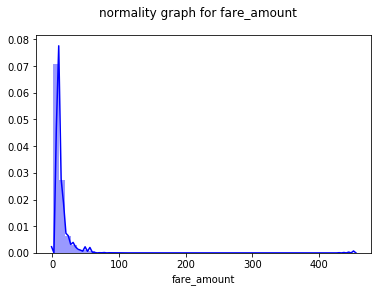

In [36]:
##################################### Univariate Analysis ###################################
# distribution of fare_amount 
sns.distplot(train['fare_amount'], color = 'blue', bins = 50)
plt.suptitle('normality graph for fare_amount')

In [37]:
skewness = train['fare_amount'].skew()
kurtosis = train['fare_amount'].kurt()
print('skewness=',skewness,'kurtosis=',kurtosis)

skewness= 10.708226936176576 kurtosis= 343.1026732816111


In [38]:
train['fare_amount'].describe()

count    15635.000000
mean        11.366476
std         10.785706
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [39]:
# Here we can see that the fare amount is not normally distributed, it is positively skewed since it's skewness is 10.7
# we will check the distribution of longitude and latitude after calculating istance from these varables in feature engineering step.

Text(0.5, 0.98, 'demand of cab based on year')

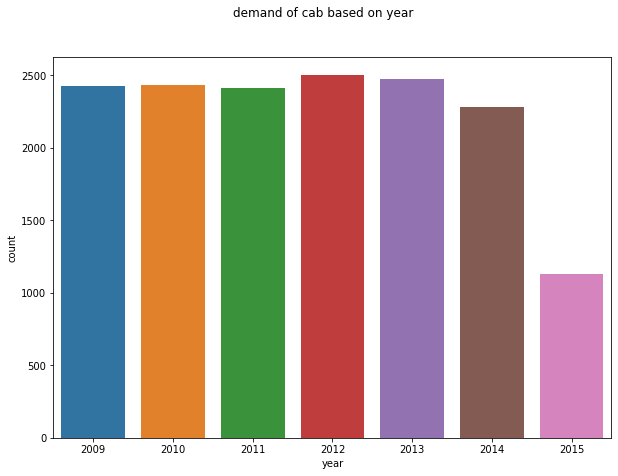

In [40]:
####################################### Bivariate Analysis #########################################
# Now we will visualise the count plots based on these attributes
#count plot for the attribute 'year'
plt.figure(figsize=(10,7))
sns.countplot(train['year'])
plt.suptitle('demand of cab based on year')

Text(0.5, 0.98, 'demand of cab based on months')

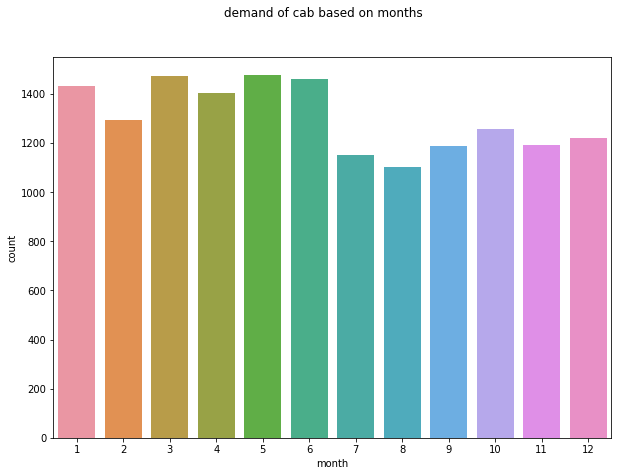

In [41]:
#count plot for the attribute 'month'
plt.figure(figsize=(10,7))
sns.countplot(train['month'])
plt.suptitle('demand of cab based on months')


Text(0.5, 0.98, 'demand of cab based on weekdays/weekends')

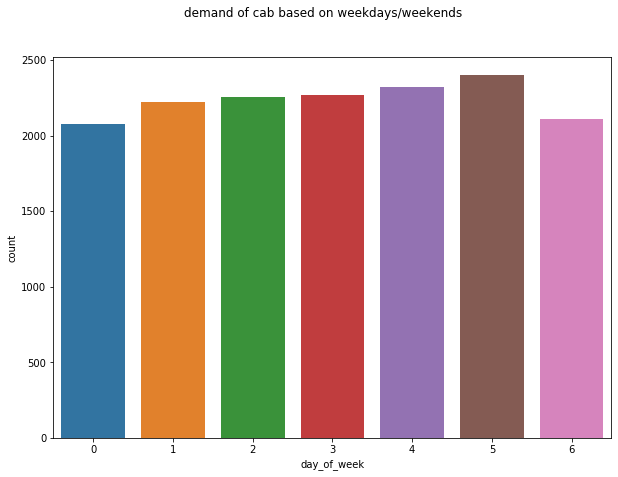

In [42]:
#count plot for the attribute 'day of week'
plt.figure(figsize=(10,7))
sns.countplot(train['day_of_week'])
plt.suptitle('demand of cab based on weekdays/weekends')

Text(0.5, 0.98, 'demand of cab based on session in a ')

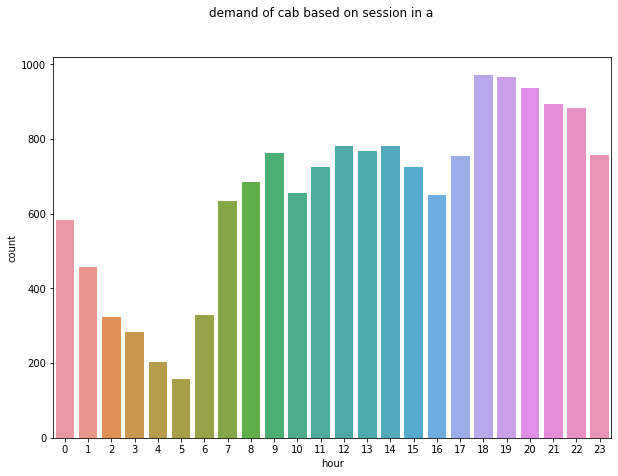

In [43]:
# count plot for the attribute hour
plt.figure(figsize=(10,7))
sns.countplot(train['hour'])
plt.suptitle('demand of cab based on session in a ')

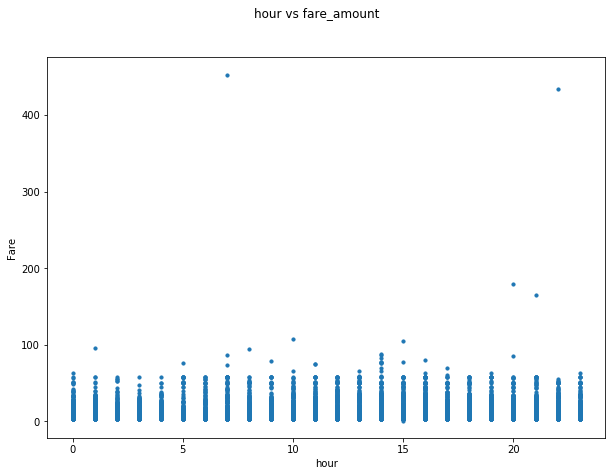

In [44]:
# now we will check the relationship between datetime attributes and fare_amount
#Relationship between Time and Fare
plt.figure(figsize=(10,7))
plt.scatter(x=train['hour'], y=train['fare_amount'], s=10)
plt.suptitle('hour vs fare_amount')
plt.xlabel('hour')
plt.ylabel('Fare')
plt.show()

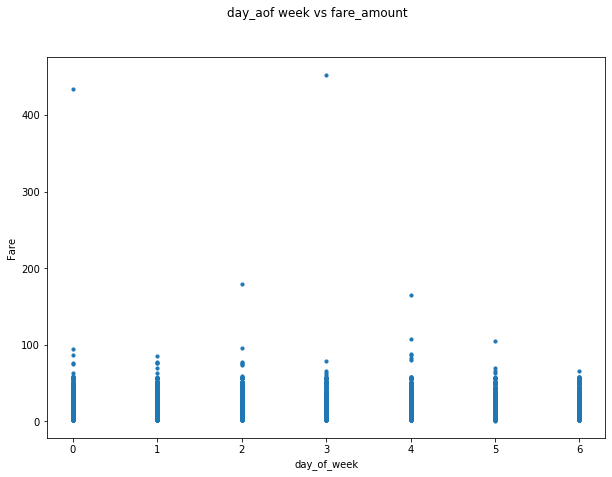

In [45]:

#Relationships between day_of_week and Fare
plt.figure(figsize=(10,7))
plt.scatter(x=train['day_of_week'], y=train['fare_amount'], s=10)
plt.suptitle('day_aof week vs fare_amount')
plt.xlabel('day_of_week')
plt.ylabel('Fare')
plt.show()

In [46]:
df = train.copy()

In [47]:
####################################### Missing Value Analysis #####################################################
#chcking for missing values in train data set.
missing_val = pd.DataFrame(train.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55
7,year,0
8,month,0
9,day_of_week,0


In [48]:
# Calculating missing percentage
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,passenger_count,0.351281
1,fare_amount,0.140512
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000
7,year,0.000000
8,month,0.000000
9,day_of_week,0.000000


In [49]:
# Here we can see that there are 24 missing values in fare_amount and 55 in passenger count.
# we will impute pasanger_count and fare_amount.


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15657 entries, 0 to 16066
Data columns (total 11 columns):
fare_amount          15635 non-null float64
pickup_datetime      15657 non-null datetime64[ns, UTC]
pickup_longitude     15657 non-null float64
pickup_latitude      15657 non-null float64
dropoff_longitude    15657 non-null float64
dropoff_latitude     15657 non-null float64
passenger_count      15602 non-null float64
year                 15657 non-null int64
month                15657 non-null int64
day_of_week          15657 non-null int64
hour                 15657 non-null int64
dtypes: datetime64[ns, UTC](1), float64(6), int64(4)
memory usage: 2.1 MB


In [51]:
#now we will impute the missing values
# choose a random variable to replace it as na
train['passenger_count'].loc[900]

2.0

In [52]:
#Replacing 2.0 with nan
train['passenger_count'].loc[900] = np.nan
train['passenger_count'].loc[900]

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


nan

In [53]:
#impute with mode
train['passenger_count'].fillna(train['passenger_count'].mode()[0]).loc[900]

1.0

In [54]:
# now we impute the fare_amount
x=train['fare_amount'].loc[900]
print('fare_amount at loc-900:{}'.format(x))
# Replacing 1.0 with NA
train['fare_amount'].loc[900] = np.nan
print('Value after replacing with nan:{}'.format(train['fare_amount'].loc[900]))
# Impute with mean
print('Value if imputed with mean:{}'.format(train['fare_amount'].fillna(train['fare_amount'].mean()).loc[900]))
# Impute with median
print('Value if imputed with median:{}'.format(train['fare_amount'].fillna(train['fare_amount'].median()).loc[900]))

fare_amount at loc-900:5.7
Value after replacing with nan:nan
Value if imputed with mean:11.366838301138532
Value if imputed with median:8.5


In [55]:
train.std()

fare_amount          10.785956
pickup_longitude      2.659390
pickup_latitude       2.613639
dropoff_longitude     2.711181
dropoff_latitude      2.632736
passenger_count       1.266231
year                  1.868888
month                 3.446475
day_of_week           1.969788
hour                  6.508122
dtype: float64

In [56]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour'],
      dtype='object')

In [57]:
columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [58]:
pickup_datetime =pd.DataFrame(train[["pickup_datetime","year","month","day_of_week","hour"]])

In [59]:
# we will drop pickup_datetime variables from train data set otherwise it will create many problems in our further calculation
train = train.drop(["pickup_datetime","year","month","day_of_week","hour"], axis =1)

In [60]:
#imputing values with KNN
train = pd.DataFrame(KNN(k = 4).fit_transform(train),columns= columns,index = train.index)

Imputing row 1/15657 with 0 missing, elapsed time: 260.826
Imputing row 101/15657 with 0 missing, elapsed time: 280.761
Imputing row 201/15657 with 0 missing, elapsed time: 283.356
Imputing row 301/15657 with 0 missing, elapsed time: 284.670
Imputing row 401/15657 with 0 missing, elapsed time: 285.042
Imputing row 501/15657 with 0 missing, elapsed time: 288.426
Imputing row 601/15657 with 0 missing, elapsed time: 293.198
Imputing row 701/15657 with 0 missing, elapsed time: 293.647
Imputing row 801/15657 with 0 missing, elapsed time: 294.212
Imputing row 901/15657 with 0 missing, elapsed time: 294.857
Imputing row 1001/15657 with 0 missing, elapsed time: 295.024
Imputing row 1101/15657 with 0 missing, elapsed time: 295.028
Imputing row 1201/15657 with 0 missing, elapsed time: 295.030
Imputing row 1301/15657 with 0 missing, elapsed time: 295.032
Imputing row 1401/15657 with 0 missing, elapsed time: 295.213
Imputing row 1501/15657 with 0 missing, elapsed time: 295.281
Imputing row 1601/15

In [61]:
train['fare_amount'].loc[900]

5.582673165501434

In [62]:
train['passenger_count'].loc[900]

2.6987965857798835

In [63]:
train.loc[900]

fare_amount           5.582673
pickup_longitude    -73.971523
pickup_latitude      40.757430
dropoff_longitude   -73.982030
dropoff_latitude     40.744883
passenger_count       2.698797
Name: 900, dtype: float64

In [64]:
# converting passenger_count to integer
train['passenger_count'] = train['passenger_count'].astype('int')

In [65]:
train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4, 0], dtype=int64)

In [66]:
train['passenger_count']= train['passenger_count'].round().astype('object').astype('category',ordered= True)
train['passenger_count'].unique()

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


[1, 2, 3, 6, 5, 4, 0]
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [67]:
train = pd.merge(pickup_datetime,train,right_index=True,left_index=True)
train.head()

,pickup_datetime,year,month,day_of_week,hour,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,2009,6,0,17,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16+00:00,2010,1,1,16,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,2011,8,3,0,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,2012,4,5,4,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,2010,3,1,7,5.3,-73.968095,40.768008,-73.956655,40.783762,1


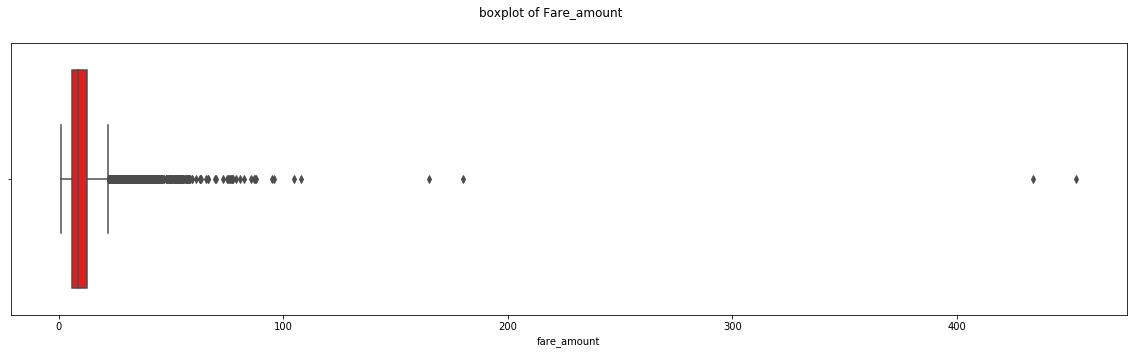

In [68]:
############################################ Outlier Analysis ##################################################################
# Now we'll treat outliers only for fare_amount and we will treat other variables after feature engineering
# Detecting outliers using bokplot
plt.figure(figsize = (20,5))
sns.boxplot(x= train['fare_amount'], data = train,color = 'red', orient = 'h')
plt.suptitle('boxplot of Fare_amount')
plt.show()

Text(0.5, 0.98, 'boxplot of fare_amount vs passenger_count')

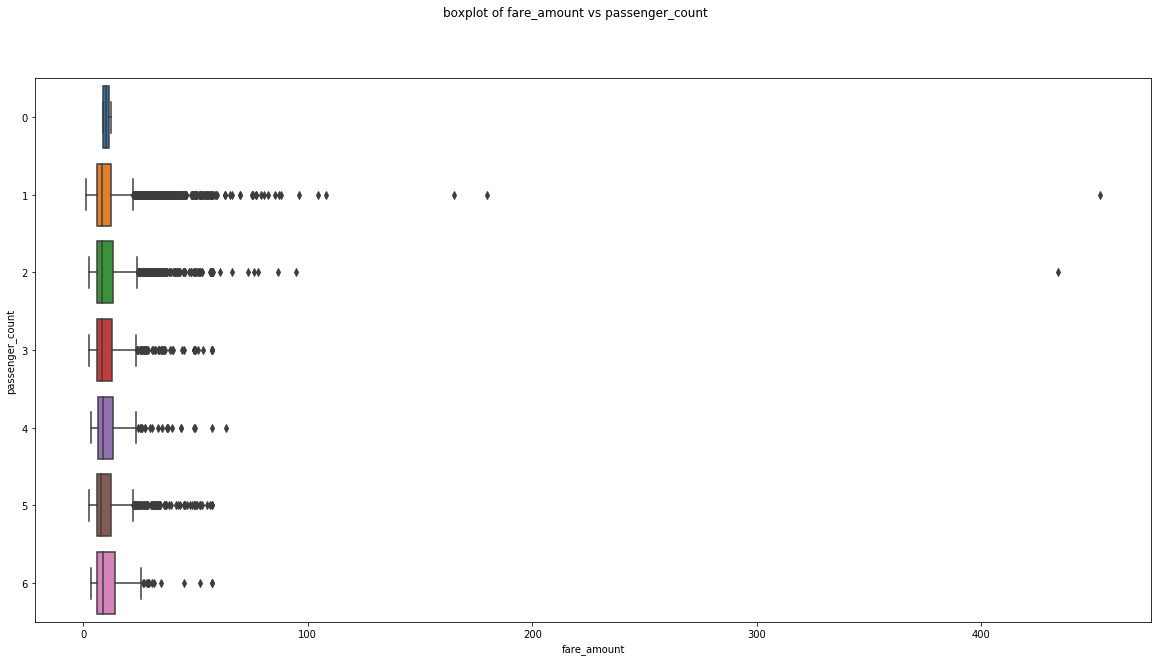

In [69]:
 # Boxplot of passenger_count vs fare_amount
data = pd.concat([train['fare_amount'],train['passenger_count']], axis = 1)
f, ax = plt.subplots(figsize = (20,10))
fig= sns.boxplot(x='fare_amount' , y='passenger_count', data = train)
plt.suptitle('boxplot of fare_amount vs passenger_count')

In [70]:
# Here we can see that trere are many outliers present in  fare_amount variable so we will remove these outliers
# Now we'll detect and remove outliers present in fare_amount
q75,q25 = np.percentile(train['fare_amount'],[75,25])
iqr = q75-q25
min = iqr - (q25*1.5)
max = iqr + (q75*1.5)
print(min)
print(max)

-2.5
25.25


In [71]:
# Remove those observations which are less than lower fence and greater than upper fence
train = train.drop(train[train['fare_amount'] < min].index)
train = train.drop(train[train['fare_amount'] > max].index)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14548 entries, 0 to 16066
Data columns (total 11 columns):
pickup_datetime      14548 non-null datetime64[ns, UTC]
year                 14548 non-null int64
month                14548 non-null int64
day_of_week          14548 non-null int64
hour                 14548 non-null int64
fare_amount          14548 non-null float64
pickup_longitude     14548 non-null float64
pickup_latitude      14548 non-null float64
dropoff_longitude    14548 non-null float64
dropoff_latitude     14548 non-null float64
passenger_count      14548 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(5), int64(4)
memory usage: 1.2 MB


Text(0.5, 0.98, 'boxplot of fare_amount after removing autliers')

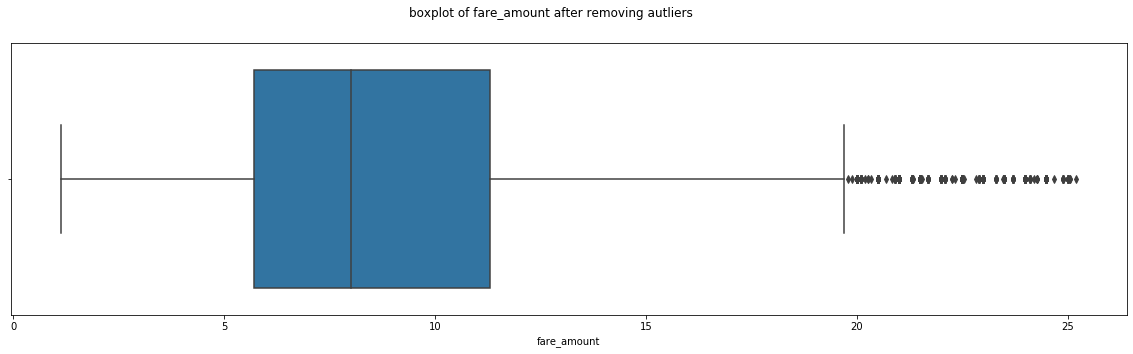

In [73]:
#boxplot for the fare_amount after removing otliers
plt.figure(figsize= (20,5))
sns.boxplot(train['fare_amount'], data = train, orient = 'h')
plt.suptitle('boxplot of fare_amount after removing autliers')

In [74]:
####################################### Feature Engineering ####################################################################

In [75]:
#In Feature engineering step we will derive session from hour and distance from pickup longitude an latitude.
#first we will derive distance from longitude and latitude.
#As we know that we have given pickup longitute and latitude values and  drop longitude latitude variable. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin,atan2, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * atan2(sqrt(a), sqrt(1-a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [76]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [77]:
train.head()
#test.head()

,pickup_datetime,year,month,day_of_week,hour,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21+00:00,2009,6,0,17,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16+00:00,2010,1,1,16,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00+00:00,2011,8,3,0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42+00:00,2012,4,5,4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00+00:00,2010,3,1,7,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [78]:
train.columns

Index(['pickup_datetime', 'year', 'month', 'day_of_week', 'hour',
       'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance'],
      dtype='object')

In [79]:
# Now we will derive sessions in a day from hour 
# Defining a function to extract sessions in a day from hour
def f(x):
    if (x >=5) and (x <= 11):
        return 'morning'
    elif (x >=12) and (x <=16 ):
        return 'afternoon'
    elif (x >= 17) and (x <= 20):
        return'evening'
    elif (x >=21) and (x <= 23) :
        return 'night_PM'
    elif (x >=0) and (x <=4):
        return'night_AM'

In [80]:
# calling function and applying on train and test data
train['session'] = train['hour'].apply(f)
test['session'] = test['hour'].apply(f)

In [81]:
#Extracting seasons from months
def g(x):
    if (x >=3) and (x <= 5):
        return 'spring'
    elif (x >=6) and (x <=8 ):
        return 'summer'
    elif (x >= 9) and (x <= 11):
        return'fall'
    elif (x >=12)|(x <= 2) :
        return 'winter'

In [82]:
train['seasons'] = train['month'].apply(g)
test['seasons'] = test['month'].apply(g)

In [83]:
# classfying weekdays and weekends in day_of_week
def h(x):
    if (x >=0) and (x <= 4):
        return 'weekday'
    elif (x >=5) and (x <=6 ):
        return 'weekend'

In [84]:
train['week'] = train['day_of_week'].apply(h)
test['week'] = test['day_of_week'].apply(h)

In [85]:
train.shape , test.shape

((14548, 15), (9914, 14))

In [86]:
train.head()

,pickup_datetime,year,month,day_of_week,hour,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,session,seasons,week
0,2009-06-15 17:26:21+00:00,2009,6,0,17,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,evening,summer,weekday
1,2010-01-05 16:52:16+00:00,2010,1,1,16,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,afternoon,winter,weekday
2,2011-08-18 00:35:00+00:00,2011,8,3,0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,night_AM,summer,weekday
3,2012-04-21 04:30:42+00:00,2012,4,5,4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,night_AM,spring,weekend
4,2010-03-09 07:51:00+00:00,2010,3,1,7,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,morning,spring,weekday


In [87]:
# labeling session variable
number = LabelEncoder()
train['session'] = number.fit_transform(train['session'].astype('str'))
test['session'] = number.fit_transform(test['session'].astype('str'))
# labeling season 
train['seasons'] = number.fit_transform(train['seasons'].astype('str'))
test['seasons'] = number.fit_transform(test['seasons'].astype('str'))
# labeling week
train['week'] = number.fit_transform(train['week'].astype('str'))
test['week'] = number.fit_transform(test['week'].astype('str'))
# Labeling year variable
train['year'] = number.fit_transform(train['year'].astype('str'))
test['year'] = number.fit_transform(test['year'].astype('str'))

In [88]:
train.head()

,pickup_datetime,year,month,day_of_week,hour,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,session,seasons,week
0,2009-06-15 17:26:21+00:00,0,6,0,17,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,1,2,0
1,2010-01-05 16:52:16+00:00,1,1,1,16,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,0,3,0
2,2011-08-18 00:35:00+00:00,2,8,3,0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,3,2,0
3,2012-04-21 04:30:42+00:00,3,4,5,4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,3,1,1
4,2010-03-09 07:51:00+00:00,1,3,1,7,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2,1,0


In [89]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,distance,session,seasons,week
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,6,1,1,13,2.323259,0,3,0
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,6,1,1,13,2.425353,0,3,0
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2,10,5,11,0.618628,2,0,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,3,12,5,21,1.961033,4,3,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,3,12,5,21,5.387301,4,3,1


In [90]:
train.columns

Index(['pickup_datetime', 'year', 'month', 'day_of_week', 'hour',
       'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance',
       'session', 'seasons', 'week'],
      dtype='object')

Text(0.5, 0.98, 'boxplot of Distance')

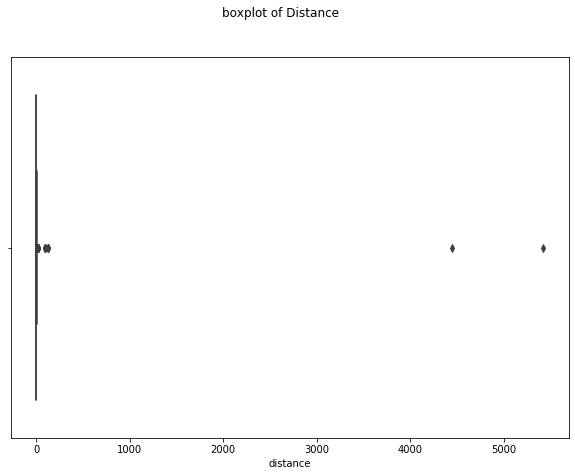

In [91]:
# Now we will check for the outliers in distance variable.
# boxplot for distance variable
plt.figure(figsize = (10, 7))
sns.boxplot(train['distance'], orient = 'h')
plt.suptitle('boxplot of Distance')

In [92]:
# Here we can see that some outliers are present in Distance ariable
# Now we will detect and remove these variables
q75, q25 = np.percentile(train['distance'], [75,25])
iqr = q75-q25
min = iqr - (q25*1.5)
max = iqr + (q75*1.5)
print(min)
print(max)

0.3771929487738168
7.306807887888465


In [93]:
# Now we will remove these observations which are greater than upper fence and less than lower fence
train = train.drop(train[train['distance']< min].index)
train = train.drop(train[train['distance']> max].index)

Text(0.5, 0.98, 'Boxplot of disance after removing outliers')

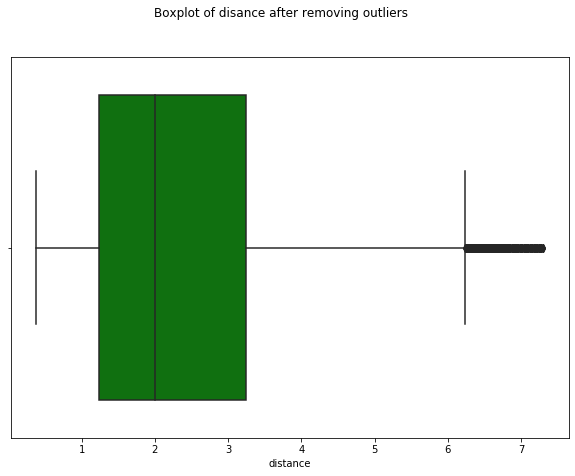

In [94]:
#Boxplot after removing outliers in distance variable
plt.figure(figsize = (10, 7))
sns.boxplot(train['distance'], color = 'green', orient = 'h')
plt.suptitle('Boxplot of disance after removing outliers')

In [95]:
########################################### Feature Selection ##########################################################
# First here we will remove those variables from which we have extracted new features that is longitude latitude, pickup_datetime
train = train.drop(['pickup_datetime','hour','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','day_of_week','month'], axis =1)
test = test.drop(['pickup_datetime','hour','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','day_of_week','month'], axis =1)

In [96]:
train.head()

,year,fare_amount,passenger_count,distance,session,seasons,week
0,0,4.5,1,1.030764,1,2,0
2,2,5.7,2,1.389525,3,2,0
3,3,7.7,1,2.799270,3,1,1
4,1,5.3,1,1.999157,2,1,0
5,2,12.1,1,3.787239,2,3,0


In [97]:
test.head()

,passenger_count,year,distance,session,seasons,week
0,1,6,2.323259,0,3,0
1,1,6,2.425353,0,3,0
2,1,2,0.618628,2,0,1
3,1,3,1.961033,4,3,1
4,1,3,5.387301,4,3,1


In [98]:
# Now we will separate catagorical variables and numerical variables to check the corrilation.
cat_var = ['year','seasons','passenger_count','session','week']
num_var = ['fare_amount','distance']
train[cat_var]=train[cat_var].apply(lambda x: x.astype('category') )
test[cat_var]=test[cat_var].apply(lambda x: x.astype('category') )

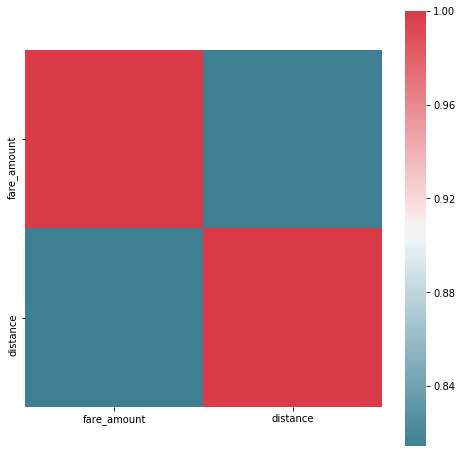

In [99]:
# Now we will check the corrilation between numerical variables through heatmape using correlation matrix
f, ax = plt.subplots(figsize = (8,8))
#Generate correlation matrix
corr_mat = train.corr()
#plot heatmmape using seaborn library
sns.heatmap(corr_mat, mask=np.zeros_like(corr_mat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


In [100]:
# Here we can see that there is a high correlation between distance and fare amount.
# to test the collinearity or dependency between catagorical variable, we will apply chi-square test of independence
# we hae already selected catagorical variables and stored in cat_var

In [101]:
# Applying chi_square test
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(train[i], train[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with P value",p,'=  remove')
            else:
                print(i,"and",j,"are independent on each other with P value",p,'= Keep')

year and seasons are dependent on each other with P value 8.421232210580892e-93 =  remove
year and passenger_count are dependent on each other with P value 2.6320302167352995e-26 =  remove
year and session are independent on each other with P value 0.8445881225252707 = Keep
year and week are dependent on each other with P value 0.023062809124273123 =  remove
seasons and year are dependent on each other with P value 8.42123221058137e-93 =  remove
seasons and passenger_count are dependent on each other with P value 0.03457422289573754 =  remove
seasons and session are independent on each other with P value 0.09686602798889939 = Keep
seasons and week are independent on each other with P value 0.12727362700748787 = Keep
passenger_count and year are dependent on each other with P value 2.6320302167352995e-26 =  remove
passenger_count and seasons are dependent on each other with P value 0.03457422289573762 =  remove
passenger_count and session are dependent on each other with P value 1.39661

In [102]:
# ANOVA test for the catagorical variable
model = ols('fare_amount ~ C(year)+C(seasons)+C(passenger_count)+C(session)+C(week)',data=train).fit()
ANOVA_table = sm.stats.anova_lm(model)
ANOVA_table

,df,sum_sq,mean_sq,F,PR(>F)
C(year),6.0,7951.162335,1325.193722,85.303277,2.433687e-105
C(seasons),3.0,544.342485,181.447495,11.679851,1.220748e-07
C(passenger_count),6.0,232.166841,38.694474,2.490780,2.073913e-02
C(session),4.0,643.688620,160.922155,10.358627,2.248181e-08
C(week),1.0,22.417944,22.417944,1.443052,2.296669e-01
Residual,13603.0,211323.772516,15.535086,NaN,NaN


In [103]:
# Multicollinearity test for all the variables through VIF
outcome, predictors = dmatrices('fare_amount ~ distance+year+passenger_count+session+seasons+week',train,return_type='dataframe')
#calculating VIF for each variable
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
VIF["features"] = predictors.columns
VIF

,VIF,features
0,3425.186988,Intercept
1,1.688485,year[T.1]
2,1.690192,year[T.2]
3,1.706162,year[T.3]
4,1.710537,year[T.4]
5,1.665170,year[T.5]
6,1.405393,year[T.6]
7,706.690287,passenger_count[T.1]
8,421.205388,passenger_count[T.2]
9,142.481441,passenger_count[T.3]


Text(0.5, 0.98, 'distribution of distance variable')

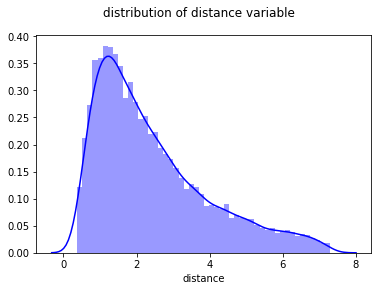

In [104]:
############################################# Feature Scalling ####################################################################
# Here we will check wheather numerical variables are normally distribubted or not
# Normality check for distance variable
sns.distplot(train['distance'],color = 'blue',bins=50)
plt.suptitle('distribution of distance variable')

In [105]:
# skewness and kurtosis of the of distance
skewness = train['distance'].skew()
kurtosis = train['distance'].kurt()
print('skewness =',skewness,'kurtosis=', kurtosis)

skewness = 1.0499080421081244 kurtosis= 0.440637353243138


Text(0.5, 0.98, 'distribution of fare_amount variable')

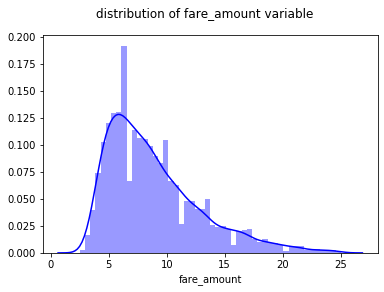

In [106]:
sns.distplot(train['fare_amount'], color = 'blue', bins = 50)
plt.suptitle('distribution of fare_amount variable')

In [107]:
#skewness and kurtosis of fare amount variable
skewness = train['fare_amount'].skew()
kurtosis = train['fare_amount'].kurt()
print('skewness =',skewness,'kurtosis=', kurtosis)

skewness = 1.15666582445666 kurtosis= 1.1759286919168832


In [108]:
train['fare_amount'].loc[20]

10.5

In [109]:
#Here we can see that fare_amount and distance variables are not normally distrubuted so we will normalize these variables.
#Normalizationa
train['distance'] = (train['distance'] - train['distance'].min())/(train['distance'].max()- train['distance'].min())

In [110]:
test['distance'] = (test['distance'] - test['distance'].min())/(test['distance'].max() - test['distance'].min())

In [111]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

In [112]:
train['fare_amount'].loc[20]

2.4423470353692043

fare_amount


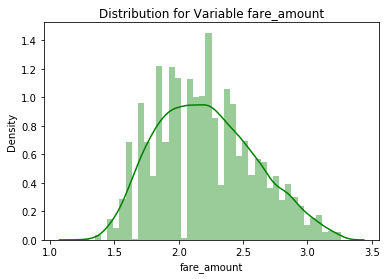

distance


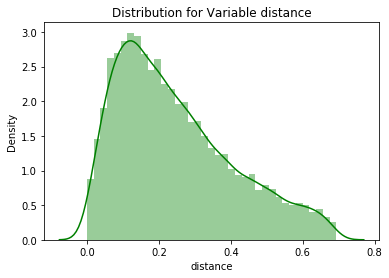

In [113]:
# Reploting after transforming into log
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [114]:
skewness = train['fare_amount'].skew()
print(skewness)

0.3059395218349297


In [115]:
skewness = train['distance'].skew()
print(skewness)

0.7461361965361342


Text(0.5, 0.98, 'distribution of distance in test data')

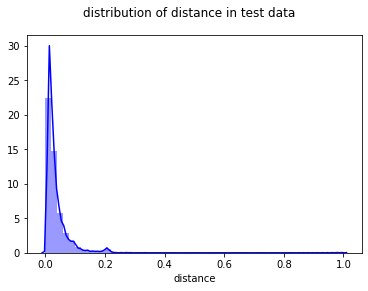

In [116]:
# We will check the normality of distance variable in test data
sns.distplot(test['distance'],color = 'blue' ,bins = 50)
plt.suptitle('distribution of distance in test data')

In [117]:
# here we ca see that distance variable in test adata is also not normally distributed so we wil take log transformation 
test['distance'] = (test['distance'] - test['distance'].min())/(test['distance'].max() - test['distance'].min())

In [118]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

Text(0.5, 0.98, 'distribution of distannce in test data')

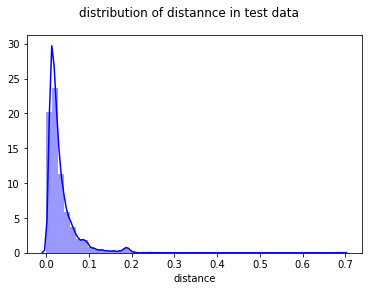

In [119]:
# After log transformation the plot of distance in test data is
sns.distplot(test['distance'], color ='blue', bins =50)
plt.suptitle('distribution of distannce in test data')

In [120]:
skewness = test['distance'].skew()
print(skewness)

4.142421419653085


In [121]:
train.head()

,year,fare_amount,passenger_count,distance,session,seasons,week
0,0,1.704748,1,0.090080,1,2,0
2,2,1.902108,2,0.136323,3,2,0
3,3,2.163323,1,0.299778,3,1,1
4,1,1.840550,1,0.210307,2,1,0
5,2,2.572612,1,0.400239,2,3,0


In [122]:
# Train test splitting for modelling
X = train.drop('fare_amount',axis=1).values
y = train['fare_amount'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print(train.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(13624, 7) (10218, 6) (3406, 6) (10218,) (3406,)


In [123]:
#################################### Multiple Linear Regression ################################################## 
fit_LR = LinearRegression().fit(X_train , y_train)

In [124]:
pred_train_LR = fit_LR.predict(X_train)

In [125]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [126]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7253814548161668

In [131]:
#calculate R^2 for test data
r2_score(y_test, pred_test_LR)

0.7046137438805404

In [127]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [128]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.1998078290041233
Root Mean Squared Error For Test data = 0.20607603673502253


In [134]:
############################## Decision Tree ############################3
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [135]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [136]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.6524348301376425

In [137]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.6229136593210711

In [138]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [139]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.22475852867550794
Root Mean Squared Error For Test data = 0.23278193107733608


In [140]:
########################################### Random Forest #####################################################
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [141]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [142]:
## calculate R^2 for train data
r2_score(y_train, pred_train_RF)

0.9599236094662843

In [143]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.6873742508499638

In [144]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.0763207019695304
Root Mean Squared Error For Test data = 0.2119538154225453


In [145]:
########################################  Gradient boosting #################################################
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [146]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [147]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.7253435498282337

In [148]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.759093799456726

In [149]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.18712079126285588
Root Mean Squared Error For Test data = 0.19866610052497302


In [150]:
################# Optimising result using parameters tuning ##############################################
rf = RandomForestRegressor(random_state = 42)
# Now we will look at the parameters which are in use in current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [151]:
#Random Hyperparameter Grid

#Random Search CV on Random Forest Model
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

# Calculating R-squared value
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.71.
RMSE =  0.20255973463860888


In [152]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [153]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#calculating R square value
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.68.
RMSE =  0.21415215258104084


In [154]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.72.
RMSE =  0.20086427687097538


In [155]:
#Grid Search CV on Gradient boosting model
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.7.
RMSE =  0.2059846733687027


In [156]:
# Here we can see thet optimised random forest gives more accuracy and higher R-square value than other model 
#so we will apply Random Forest model on the given test data


In [170]:
#Applying model on the tetst data
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [171]:
print(predictions_GRF_test_Df)

[1.73573683 1.73573683 1.71638035 ... 2.34022842 2.07862736 1.68676391]


In [173]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [174]:
test.head()

,passenger_count,year,distance,session,seasons,week,Predicted_fare
0,1,6,0.042219,0,3,0,1.735737
1,1,6,0.043991,0,3,0,1.735737
2,1,2,0.011608,2,0,1,1.716380
3,1,3,0.035876,4,3,1,1.683924
4,1,3,0.092691,4,3,1,1.834377
